In [1]:
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime as dt,timedelta
from cartopy import crs as ccrs
from lib import driver
import lib 

from lib.tools import get_cmap_levels
from lib.tools import add_prop



In [2]:
T_INIT=dt(2017,1,1)
pc_convert = None
PLOTDIR = './'
LT = set([(21,28)])
DPI=120
credit='NOAA/PSL and University of Colorado/CIRES \nExperimental LIM Forecast (v2)'

In [3]:
LIMdriver = driver.Driver(f'/home/ycheng/LIM/v2_CPC/run_code/namelist_realtime.py')
LIMdriver.get_variables()

reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SST.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SF750.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SF100.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_T2m.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SLP.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_H500.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_colIrr.p
reading  data_clim/tmp/fullyr_JRA_58-16_sliding_climo_SOIL.p


In [29]:
ds = xr.open_dataset('/Projects/jalbers_process/CPC_LIM/yuan_ming/CPC/Images_realtime/20230926/SOIL/SOIL.20230926.nc')
FMAP = varobj.flatten(np.array(ds['SOIL_anom'][31]))
varobj = LIMdriver.use_vars['SOIL']['data']


In [12]:
# varname = 'SF750'
# varname = 'SF100'
# varname = 'SLP'
varname = 'SST'
# varname = 'colIrr'
# varname = 'H500'
ds = xr.open_dataset(f'/Projects/jalbers_process/CPC_LIM/yuan_ming/CPC/Images_hindcast_fold_10_seasonally_changing_vars_test/20110115/{varname}/{varname}.20110115.nc')
varobj = LIMdriver.use_vars[varname]['data']
# ds
FMAP = varobj.flatten(np.array(ds[f'{varname}_anom'][0]))


In [15]:
def plot_map(varname, FMAP,prop={}):

    r"""
    Plots maps from PCs.

    Parameters
    ----------
    varname : str
        Must be a variable name in the list of keys used in the LIM

    Other Parameters
    ----------------
    prop : dict
        Customization properties for plotting
    """

    #Set default properties
    default_prop={'cmap':None,'levels':None,'title':None,'figsize':(10,6),'dpi':120,
                  'drawcountries':True,'drawstates':True,'addtext':None}
    prop = add_prop(prop,default_prop)
    
    t_init = dt(2011,9,23)
    lead_times = [21]


    # if t_init is None:
    #     t_init = max(self.RT_VARS['time'])

    # ilt = np.array([self.lead_times.index(l) for l in lead_times])
    # LT_lab = '-'.join([str(int(l/7)) for l in lead_times])
    # fname_lab = '-'.join([f'{int(l):03}' for l in lead_times])
    # # varobj = self.use_vars[varname]['data']


    # FMAP = np.mean(self.F_recon[t_init][varname][ilt],axis=0)
    # SMAP = np.mean(self.E_recon[t_init][varname][ilt],axis=0)



    if prop['cmap'] is None:
        prop['cmap'] = {0:'violet',22.5:'mediumblue',40:'lightskyblue',47.5:'w',52.5:'w',60:'gold',77.5:'firebrick',100:'violet'}
    if prop['levels'] is None:
        prop['levels'] = (-np.nanmax(abs(FMAP)),np.nanmax(abs(FMAP)))
    prop['cmap'],prop['levels'] = get_cmap_levels(prop['cmap'],prop['levels'])
    prop['extend']='both'
    ax = varobj.plot_map(FMAP, prop = prop)
    ax.set_title(f'{varname} \nAnomaly',loc='left',fontweight='bold',fontsize=14)
    ax.set_title(f'Init: {t_init:%a %d %b %Y}\n'+
                 f'Valid: {t_init+timedelta(days=min(lead_times)-6):%d %b} – {t_init+timedelta(days=max(lead_times)):%d %b}',
                 loc='right',fontsize=14)

    if prop['addtext'] is not None:
        if varname == 'T2m' or varname == 'SOIL':
            ax.text( 0.04, 0.06, prop['addtext'], ha='left', va='bottom', transform=ax.transAxes,fontsize=9,zorder=99)
        elif varname == 'colIrr':
            ax.text( -0.0, -0.25, prop['addtext'].replace("\n", " "), ha='left', va='bottom', transform=ax.transAxes,fontsize=9,zorder=99)
        elif varname == 'SST':
            ax.text( -0.0, -0.5, prop['addtext'].replace("\n", " "), ha='left', va='bottom', transform=ax.transAxes,fontsize=6,zorder=99)
        else:
            ax.text( -0.0, -0.08, prop['addtext'], ha='left', va='bottom', transform=ax.transAxes,fontsize=9,zorder=99)
            

    #if save_to_path is None:
    #    plt.show()
    # if not isinstance(save_to_path,str):
    #     print('WARNING: save_to_file must be a string indicating the path to save the figure to.')
    # else:
    #     print(f'saving figure to: {save_to_path}/{varname}_lt{fname_lab}_{t_init:%Y%m%d}.png')
    #     plt.savefig(f'{save_to_path}/{varname}_lt{fname_lab}_{t_init:%Y%m%d}.png',bbox_inches='tight')
    # plt.close()

    # make probabilistic forecast map

    # if categories=='mean':
    #     bounds = [-np.inf*np.ones(len(FMAP))]+[np.zeros(len(FMAP))]+[np.inf*np.ones(len(FMAP))]
    # else:
    #     ptiles = np.linspace(0,100,categories+1)[1:-1]
    #     newobj = copy.deepcopy(varobj)
    #     datebounds = (f'{t_init-timedelta(days=30):%m/%d}',f'{t_init+timedelta(days=30):%m/%d}')
    #     newobj.subset(datebounds=datebounds)
    #     climodata = newobj.running_mean
    #     pbounds = [np.percentile(climodata,p,axis=0) for p in ptiles]
    #     bounds = [-np.inf*np.ones(len(FMAP))]+pbounds+[np.inf*np.ones(len(FMAP))]

    # cat_fcst = get_categorical_fcst((FMAP,),(SMAP,),bounds)[0]

    # if categories in (2,'mean') and not np.all(np.isnan(cat_fcst[1])):
    #     cmap,levels = get_cmap_levels(prop['cmap'],np.arange(0,101,5))
    #     prop['cmap'] = cmap
    #     prop['levels'] = np.arange(0,101,5)
    #     prop['cbarticks'] = [0,10,20,30,40,60,70,80,90,100]
    #     prop['cbarticklabels']=['Below',90,80,70,60,60,70,80,90,'Above']
        # prop['extend']='neither'
        # prop['cbar_label']='%'
        # ax = varobj.plot_map(cat_fcst[1]*100, prop = prop)
        # #ax = plot_map(cat_fcst[1]*100,cmap = cmap, levels = levels, prop = prop)
        # ax.set_title(f'{varname} \nProbability',loc='left',fontweight='bold',fontsize=14)
        # ax.set_title(f'Init: {t_init:%a %d %b %Y}\n'+
        #              f'Valid: {t_init+timedelta(days=min(lead_times)-6):%d %b} – {t_init+timedelta(days=max(lead_times)):%d %b}',
        #              loc='right',fontsize=14)

        # if prop['addtext'] is not None:
        #     ax.text( 0.04, 0.06, prop['addtext'], ha='left', va='bottom', transform=ax.transAxes,fontsize=9,zorder=99)

        # if save_to_path is None:
        #     plt.show()
        # elif not isinstance(save_to_path,str):
        #     print('WARNING: save_to_path must be a string indicating the path to save the figure to.')
        # else:
        #     plt.savefig(f'{save_to_path}/{varname}-PROB_lt{fname_lab}_{t_init:%Y%m%d}.png',bbox_inches='tight')
    #     plt.close()

    # if categories==3 and not np.all(np.isnan(cat_fcst[1])):

    #     cat0map = np.where(cat_fcst[0]>1/3,cat_fcst[0],0)*-1
    #     cat2map = np.where(cat_fcst[2]>1/3,cat_fcst[2],0)
    #     fcstmap = 100*(cat0map+cat2map)

    #     cmap,levels = get_cmap_levels({0:'violet',1/6:'mediumblue',1/3:'lightskyblue',1/3+.001:'w',2/3-.001:'w',2/3:'gold',5/6:'firebrick',1:'violet'},np.linspace(-100,100,256))
    #     prop['cmap'] = cmap
    #     prop['levels'] = [-100,-90,-80,-70,-60,-50,-40,-33,33,40,50,60,70,80,90,100]
    #     prop['cbarticks'] = [-100,-90,-80,-70,-60,-50,-40,-33,33,40,50,60,70,80,90,100]
    #     prop['cbarticklabels']=['Below',90,80,70,60,50,40,33,33,40,50,60,70,80,90,'Above']
    #     prop['extend']='neither'
    #     prop['cbar_label']='%'
    #     ax = varobj.plot_map(fcstmap, prop = prop)
    #     #ax = plot_map(cat_fcst[1]*100,cmap = cmap, levels = levels, prop = prop)
        # ax.set_title(f'{varname} \nProbability',loc='left',fontweight='bold',fontsize=14)
        # ax.set_title(f'Init: {t_init:%a %d %b %Y}\n'+
        #              f'Valid: {t_init+timedelta(days=min(lead_times)-6):%d %b} – {t_init+timedelta(days=max(lead_times)):%d %b}',
        #              loc='right',fontsize=14)

        # if prop['addtext'] is not None:
        #     ax.text( 0.04, 0.06, prop['addtext'], ha='left', va='bottom', transform=ax.transAxes,fontsize=9,zorder=99)

        # if save_to_path is None:
        #     plt.show()
        # elif not isinstance(save_to_path,str):
        #     print('WARNING: save_to_path must be a string indicating the path to save the figure to.')
        # else:
        #     plt.savefig(f'{save_to_path}/{varname}-PROB_lt{fname_lab}_terciles_{t_init:%Y%m%d}.png',bbox_inches='tight')
        # plt.close()

/home/ycheng/LIM/CPC/run_code/lib/dataset.py:433: RuntimeWarning: Mean of empty slice
  zmap[ipole] = np.nanmean(zmap[tuple([ipole[0]-1,ipole[1]])])


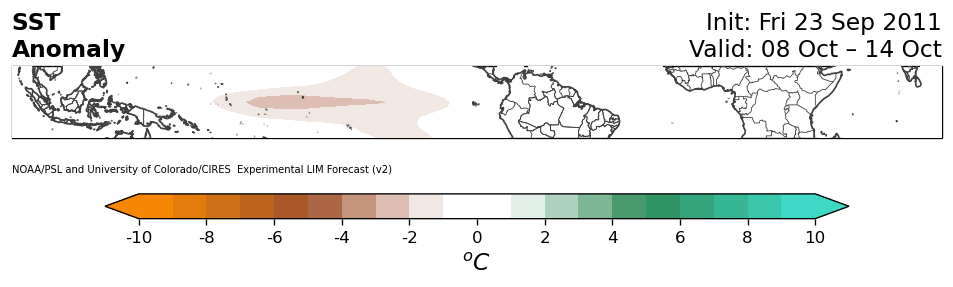

In [16]:
# if prop['cmap'] is None:
    # prop['cmap'] = {0:'violet',22.5:'mediumblue',40:'lightskyblue',47.5:'w',52.5:'w',60:'gold',77.5:'firebrick',100:'violet'}
# if prop['levels'] is None:
    # prop['levels'] = (-np.nanmax(abs(FMAP)),np.nanmax(abs(FMAP)))
# prop['cmap'],prop['levels'] = get_cmap_levels(prop['cmap'],prop['levels'])
# prop['extend']='both'
# plot_map('SOIL',FMAP,\
#             prop={'cmap':{-2:'darkorange',-1:'sienna',-0.2:'w',0.2:'w',1:'seagreen',2:'turquoise'},\
#             'levels':np.linspace(-.4,.4,17),'cbarticklabels':[f'{np.round(i,1):.1f}' for i in np.linspace(-.4,.4,9)],\
#                 'dpi':DPI,'addtext':credit}) 
plot_map(varname,FMAP,\
            prop={'cmap':{-2:'darkorange',-1:'sienna',-0.2:'w',0.2:'w',1:'seagreen',2:'turquoise'},\
            'levels':np.linspace(-10,10,21).astype(int),'cbar_label':'$^oC$',\
                'dpi':DPI,'addtext':credit})  

# LIMdriver.plot_map(varname='SF750',t_init=T_INIT,lead_times=LT,fullVariance=fullVariance,add_offset=None,gridded=True,\
                    # prop={'levels':np.linspace(-100e5,100e5,21).astype(int),'cbar_label':'$m^2s^{-1}$','dpi':DPI,'addtext':credit},save_to_path = f'{FCSTDIR}/no_offset/SF750')            
        
# ax = varobj.plot_map(FMAP, prop = prop)

# ax.set_title(f'{varname} \nAnomaly',loc='left',fontweight='bold',fontsize=14)
# ax.set_title(f'Init: {t_init:%a %d %b %Y}\n'+
#                 f'Valid: {t_init+timedelta(days=min(lead_times)-6):%d %b} – {t_init+timedelta(days=max(lead_times)):%d %b}',
#                 loc='right',fontsize=14)

In [9]:
# FMAP = varobj.flatten(np.array(ds['SOIL_anom'][31]))
# ax = varobj.plot_map(FMAP, prop = {'interpolate':1,'cbar_label':'$m$','dpi':DPI})


['-1.0',
 '-0.9',
 '-0.8',
 '-0.7',
 '-0.6',
 '-0.5',
 '-0.4',
 '-0.3',
 '-0.2',
 '-0.1',
 '0.0',
 '0.1',
 '0.2',
 '0.3',
 '0.4',
 '0.5',
 '0.6',
 '0.7',
 '0.8',
 '0.9',
 '1.0']

(15.0, 75.0)

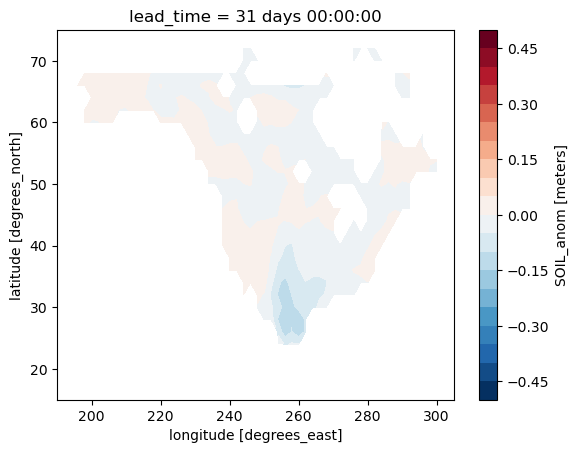

In [18]:
# contour_levels = np.arange(-0.5,0.6,0.05) 
contour_levels = np.linspace(-0.5,0.5,21)# Replace with your desired contour levels
lat_bounds = [15, 75]  # Replace with your desired latitude boundaries
lon_bounds = [190, 305]   # Replace with your desired longitude boundaries

fig, ax = plt.subplots()
ds['SOIL_anom'][31].plot.contourf(ax=ax, levels=contour_levels, projection=ccrs.PlateCarree())
ax.set_xlim([lon_bounds[0], lon_bounds[1]])
ax.set_ylim([lat_bounds[0], lat_bounds[1]])


In [29]:
climo_values_without_nan = ds['climo']['doy'==0].where(~np.isnan(ds['climo']['doy'==0]), drop=True)
# ds['climo']['doy'==0]
# Select the DataArray of interest and exclude 'lat' and 'lon' dimensions
climo_data = ds['climo'].sel(doy=0)

# Create a mask for missing values
missing_values_mask = climo_data.isna()

# Count the number of missing values while excluding 'lat' and 'lon' dimensions
num_missing_values = missing_values_mask.sum(dim=('lat', 'lon'))

print(num_missing_values)

KeyError: "not all values found in index 'doy'. Try setting the `method` keyword argument (example: method='nearest')."

In [27]:
print(climo_values_without_nan[10])
28*56

<xarray.DataArray 'climo' (lon: 56)>
array([      nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan,       nan,
             nan,       nan,       nan,       nan,       nan, 277.618  ,
       273.9168 , 268.06036, 265.56955, 264.90802, 264.55566, 262.38806,
       262.7252 , 262.87442, 262.08823, 260.81094, 259.49805, 258.66428,
       257.59412, 256.70822, 255.85974, 255.87091, 254.39511, 253.63649,
       253.32295, 253.05573, 253.00226, 253.08861, 253.2172 , 253.34042,
             nan,       nan, 254.90013, 254.61104, 254.50023, 254.19276,
       253.75214, 253.81581, 254.20633, 254.96013, 256.10104, 258.3083 ,
       260.30316,       nan], dtype=float32)
Coordinates:
  * lon      (lon) float64 194.0 196.0 198.0 200.0 ... 298.0 300.0 302.0 304.0
    lat      float64 54.0
    doy      float64 1.0
Attributes:
    long_name:  Climatology


1568

In [28]:
import numpy as np

arr = np.array([1, 2, 3, np.nan, 5])
mean = np.mean(arr)  # Returns NaN
print(mean)
arr = np.array([1, 2, 3, np.nan, 5])
mean = np.nanmean(arr)  # Returns 2.75
print(mean)


nan
2.75


In [53]:
lat2strNodeg(0)

'0N'